Пусть имеется некоторая величина, принимающая значения 0 и 1 (например, рост или падение цены некоторого актива).

Также есть две модели, предсказывающие значение этой величины.

Каждая из них возвращает вещественное предсказание от 0 до 1.

Чем ближе предсказание к 1, тем модель более "уверена", что наблюдаемая величина примет именно значение 1.

У вас есть функция real_and_models(), возвращающая значение самой величины, а также предсказания обеих моделей.

In [1]:
from inner.src import real_and_models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
real_and_models()

{'first_model': 0.24034462750873498,
 'real': 0,
 'second_model': 0.3477342558938641}

Напишите код, измеряющий, какая из двух моделей дает более точное предсказание.

Какое минимальное количество наблюдений (вызовов real_and_models) вам необходимо для этого?

Почему именно такое?

In [3]:
data = pd.DataFrame([[real_and_models()['real'], real_and_models()['first_model'], real_and_models()['second_model']] for i in range(0,2)], columns=['real','first_model', 'second_model'])

In [7]:
def accumulate_truth(iterable):
    true = 0
    false = 0
    for i in iterable:
        if i:
            true += 1
        else:
            false += 1
        yield true, false

def make_plot(x,y, auc, name):
    plt.title('Receiver Operating Characteristic with '+name)
    plt.plot(x, y, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def Roc_auc(scores, targets, name = 'first model'):
    total_targets = sum(targets)
    length_sub_targets = len(targets) - total_targets

    scores, targets = zip(*sorted(zip(scores, targets), reverse=True))
    tprs = []
    fprs = []
    for true, false in accumulate_truth(targets):
        tprs.append(true / total_targets)
        fprs.append(false / length_sub_targets)
    
    auc = np.trapz(np.sort(tprs), np.sort(fprs))
    
    make_plot(tprs, fprs, auc, name)
    
    return tprs, fprs, auc

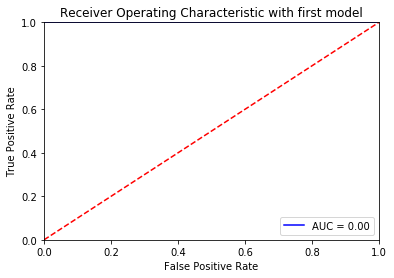

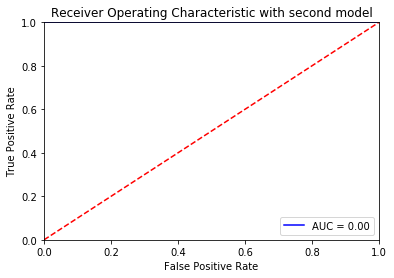

Same scroe


In [11]:
rez1, rez2 = Roc_auc(data['first_model'].as_matrix(), data['real'].as_matrix())[2], Roc_auc(data['second_model'].as_matrix(), data['real'].as_matrix(), name = 'second model')[2]
if rez1 > rez2:
    print ('First model win')
elif rez1 == rez2:
    print ('Same scroe')
else:
    print ('Second model win')

Какое минимальное количество наблюдений (вызовов real_and_models) вам необходимо для этого?

Почему именно такое?

Минимум 2, для того, чтобы построить roc-cruve и посчитать площадь по ней. 

Хотя для оценки моделей хватит и одного вызова. Просто выбрав предсказание лучше.